In [1]:
import pandas as pd

In [103]:
df=pd.read_csv('C:/Users/Janardhan/Desktop/TSLA.csv')

In [104]:
df['Date']=pd.to_datetime(df['Date'])

In [105]:
df=df.set_index('Date')

In [106]:
#df.shape[0]

In [107]:
length = df.shape[0] - 20 +1
#the required dataframe length needs to be 20 days less than the actual dataframe because the starting 20 values will be NaN

In [108]:
#length

In [109]:
df_close=df[['Close Price']] #only the close price data 

In [110]:
s_deviation=df_close.rolling(20).std()
s_deviation=s_deviation.dropna()
s_deviation.head()

,Close Price
Date,
2019-09-27,14.678151
2019-09-26,9.057088
2019-09-25,9.805625
2019-09-24,10.797775
2019-09-23,10.611558


In [111]:
#bollinger middle band
bolm=df_close.rolling(20).mean() #sma_20
bolm=bolm.dropna()
bolm=bolm.rename(columns={'Close Price':'bol_middle'})
bolm.head()

,bol_middle
Date,
2019-09-27,250.3585
2019-09-26,247.5025
2019-09-25,246.2035
2019-09-24,244.5850
2019-09-23,243.9715


In [112]:
#Bollinger upper band
l=[]
for i in range(length):
    l+=[bolm.iloc[i,0] + 2*s_deviation.iloc[i,0]]
#Bollinger lower band
s=[]
for i in range(length):
    s+=[bolm.iloc[i,0] - 2*s_deviation.iloc[i,0]]
df_bol=pd.DataFrame({'bol_upper':l,'bol_lower':s})
df_bol.head()

,bol_upper,bol_lower
0,279.714803,221.002197
1,265.616676,229.388324
2,265.814751,226.592249
3,266.180550,222.989450
4,265.194616,222.748384


In [113]:
df_close=df_close.iloc[19:] #omitting the first 20 values 

In [114]:
df_close['bol_lower'] = 'Nan'
df_close['bol_middle'] = 'Nan'
df_close['bol_upper'] = 'Nan'
df_close['Call']='NaN'
for i in range(length):
    df_close.iloc[i,1] = df_bol.iloc[i,1] #lower
    df_close.iloc[i,2] = bolm.iloc[i,0] #middle
    df_close.iloc[i,3] =df_bol.iloc[i,0] #upper
for i in range(length):
    if(df_close.iloc[i,0] < df_close.iloc[i,1]): #Close price < lower bollinger band
        df_close.iloc[i,4] = 'Buy'
    elif(df_close.iloc[i,0] > df_close.iloc[i,3]): #Close price > upper bollinger band
        df_close.iloc[i,4] = 'Short'
    elif((df_close.iloc[i,0] > df_close.iloc[i,1]) & (df_close.iloc[i,0] < df_close.iloc[i,2])): #close price btw lower and middle
        df_close.iloc[i,4] = 'Hold Buy'
    elif((df_close.iloc[i,0] > df_close.iloc[i,2]) & (df_close.iloc[i,0] < df_close.iloc[i,3])): #close price btw middle and upper
        df_close.iloc[i,4] = 'Hold Short'
df_close

,Close Price,bol_lower,bol_middle,bol_upper,Call
Date,,,,,
2019-09-27,242.13,221.002,250.358,279.715,Hold Buy
2019-09-26,242.56,229.388,247.502,265.617,Hold Buy
2019-09-25,228.70,226.592,246.203,265.815,Hold Buy
2019-09-24,223.21,222.989,244.585,266.181,Hold Buy
2019-09-23,241.23,222.748,243.971,265.195,Hold Buy
2019-09-20,240.62,222.795,243.155,263.515,Hold Buy
2019-09-19,246.60,223.947,242.386,260.826,Hold Short
2019-09-18,243.49,225.02,241.573,258.127,Hold Short
2019-09-17,244.79,226.143,240.918,255.694,Hold Short


In [115]:
import matplotlib.pyplot as plt

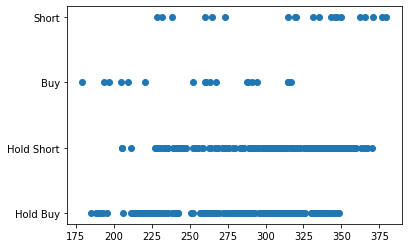

In [116]:
x=plt.scatter(x=df_close['Close Price'],y=df_close['Call'])
#x=plt.scatter(x=df_close['bol_lower'],y=df_close['Call'],color='red')
#x=plt.scatter(x=df_close['bol_middle'],y=df_close['Call'],color='green')
#x=plt.scatter(x=df_close['bol_upper'],y=df_close['Call'],color='cyan')

## Performing Multi Class logistic regression

### Multiclass logistic regression is performed by using One Vs Rest method 
The One Vs Rest classifier is present in sklearn module

In [117]:
#module initialisation
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

In [118]:
# These are the different classification model which can be trained using sklearn

from sklearn.linear_model import LogisticRegression #Basic logistic regression
from sklearn.svm import LinearSVC #Linear Support Vector Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Linear Discriminant Analysis
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Trees and Random Forest 

In [119]:
X = df_close.drop(['Call'],axis=1) #features

In [120]:
y = df_close['Call'] #labels

In [121]:
#splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [128]:
#creating an instance for Logistic Regression
SVC_model = OneVsRestClassifier(LinearSVC()) #SVC method
KNN_model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5)) #KNN method

In [137]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

C:\Users\Janardhan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Janardhan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Janardhan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Janardhan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None)

## Overfitting the data i.e, repeating the training process multiple times may decrease the accuracy of the model

In [138]:
#predicting the accuracy of the model
print('SVC Model Accuracy',SVC_model.score(X_train,y_train))
print('KNN Model Accuracy',KNN_model.score(X_train,y_train))

SVC Model Accuracy 0.8863049095607235
KNN Model Accuracy 0.917312661498708


In [139]:
print(SVC_model.score(X_test,y_test))
print(KNN_model.score(X_test,y_test))

0.8350515463917526
0.8144329896907216


In [140]:
print(SVC_model.score(X,y))
print(KNN_model.score(X,y))

0.8760330578512396
0.8966942148760331


In [142]:
comparison = pd.DataFrame({'Actual':df_close['Call'],'Predicted_SVC':SVC_model.predict(X),'Predicted_KNN':KNN_model.predict(X)})
comparison

,Actual,Predicted_SVC,Predicted_KNN
Date,,,
2019-09-27,Hold Buy,Hold Buy,Hold Buy
2019-09-26,Hold Buy,Hold Buy,Hold Buy
2019-09-25,Hold Buy,Hold Buy,Hold Buy
2019-09-24,Hold Buy,Hold Buy,Hold Buy
2019-09-23,Hold Buy,Hold Buy,Hold Buy
2019-09-20,Hold Buy,Hold Buy,Hold Buy
2019-09-19,Hold Short,Hold Short,Hold Short
2019-09-18,Hold Short,Hold Buy,Hold Short
2019-09-17,Hold Short,Hold Short,Hold Short


### Using the previous trained model and fitting new data and predicting the accuracy and values

In [143]:
# Program to create bollinger columns for new stock

df=pd.read_csv(r'C:\Users\Janardhan\Desktop\Large_Cap\M&M.csv')
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
length = df.shape[0] - 20 +1
df_close=df[['Close Price']]

#calculating the standard deviation
s_deviation=df_close.rolling(20).std()
s_deviation=s_deviation.dropna()

#Bollinger middle band
bolm=df_close.rolling(20).mean() #sma_20
bolm=bolm.dropna()
bolm=bolm.rename(columns={'Close Price':'bol_middle'})

#Bollinger upper band
l=[]
for i in range(length):
    l+=[bolm.iloc[i,0] + 2*s_deviation.iloc[i,0]]
#Bollinger lower band
s=[]
for i in range(length):
    s+=[bolm.iloc[i,0] - 2*s_deviation.iloc[i,0]]
df_bol=pd.DataFrame({'bol_upper':l,'bol_lower':s})

df_close=df_close.iloc[19:]

df_close['bol_lower'] = 'Nan'
df_close['bol_middle'] = 'Nan'
df_close['bol_upper'] = 'Nan'
df_close['Call']='NaN'

for i in range(length):
    df_close.iloc[i,1] = df_bol.iloc[i,1] #lower
    df_close.iloc[i,2] = bolm.iloc[i,0] #middle
    df_close.iloc[i,3] =df_bol.iloc[i,0] #upper

#Creating the call column    
for i in range(length):
    if(df_close.iloc[i,0] < df_close.iloc[i,1]): #Close price < lower bollinger band
        df_close.iloc[i,4] = 'Buy'
    elif(df_close.iloc[i,0] > df_close.iloc[i,3]): #Close price > upper bollinger band
        df_close.iloc[i,4] = 'Short'
    elif((df_close.iloc[i,0] > df_close.iloc[i,1]) & (df_close.iloc[i,0] < df_close.iloc[i,2])): #close price btw lower and middle
        df_close.iloc[i,4] = 'Hold Buy'
    elif((df_close.iloc[i,0] > df_close.iloc[i,2]) & (df_close.iloc[i,0] < df_close.iloc[i,3])): #close price btw middle and upper
        df_close.iloc[i,4] = 'Hold Short'
df_new = df_close

#predicting these values with already trained logistic regression model
X1 = df_new.drop(['Call'],axis=1)
y1 = df_new['Call']

In [145]:
#log_reg is the instance created in previous trained logistic regression model but we are feeding new data of different stock
print(SVC_model.score(X1,y1))
print(KNN_model.score(X1,y1))

0.7552301255230126
0.41841004184100417


In [147]:
comparison = pd.DataFrame({'Actual':df_new['Call'],'Predicted_SVC':log_reg.predict(X1),'Predicted_KNN':KNN_model.predict(X1)})
comparison

,Actual,Predicted_SVC,Predicted_KNN
Date,,,
2017-06-09,Hold Short,Hold Buy,Hold Buy
2017-06-12,Hold Short,Hold Buy,Hold Buy
2017-06-13,Hold Short,Hold Buy,Hold Buy
2017-06-14,Hold Short,Hold Buy,Hold Buy
2017-06-15,Hold Short,Hold Buy,Hold Buy
2017-06-16,Hold Short,Hold Buy,Hold Buy
2017-06-19,Hold Buy,Hold Buy,Hold Buy
2017-06-20,Hold Buy,Hold Buy,Hold Buy
2017-06-21,Hold Buy,Hold Buy,Hold Buy


In [200]:
#training a new model
df=pd.read_csv('C:/Users/Janardhan/Desktop/TSLA.csv')

In [201]:
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
df['Open_Close'] = 'NaN'
df['Low_High'] = 'NaN'

In [202]:
for i in range(df.shape[0]):
    df.iloc[i,5] = (df.iloc[i,0] - df.iloc[i,1])/df.iloc[i,1]
    df.iloc[i,6] = (df.iloc[i,2] - df.iloc[i,3])/df.iloc[i,3]  
rolling_mean = df['Close Price'].rolling(5).mean()
rolling_std = df['Close Price'].rolling(5).std()
df['Rolling_mean'] = rolling_mean
df['Rolling_std'] = rolling_std
df['Action'] = 'NaN'

for i in range(df.shape[0]-1):
    if(df.iloc[i+1,0] > df.iloc[i,0]):
        df.iloc[i,9] = 1
    if(df.iloc[i+1,0] < df.iloc[i,0]):
        df.iloc[i,9] = -1
        
df = df.dropna()

In [203]:
df.dtypes

Close Price              float64
Open Price               float64
High Price               float64
Low Price                float64
Total Traded Quantity     object
Open_Close                object
Low_High                  object
Rolling_mean             float64
Rolling_std              float64
Action                    object
dtype: object

In [205]:
df.isna().any()

Close Price              False
Open Price               False
High Price               False
Low Price                False
Total Traded Quantity    False
Open_Close               False
Low_High                 False
Rolling_mean             False
Rolling_std              False
Action                   False
dtype: bool

In [206]:
df['Action'] = df['Action'].astype('float') 

In [212]:
df = df.dropna()

In [213]:
df

,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Open_Close,Low_High,Rolling_mean,Rolling_std,Action
Date,,,,,,,,,,
2019-10-18,256.95,260.70,262.80,255.10,5.75M,-0.0143843,0.0301842,264.078,19.942062,1.0
2019-10-17,261.97,262.50,264.78,260.17,4.78M,-0.00201905,0.0177192,256.536,3.289214,-1.0
2019-10-16,259.75,257.39,262.10,256.92,6.70M,0.00916897,0.0201619,257.550,3.354840,-1.0
2019-10-15,257.89,257.70,260.00,254.12,6.48M,0.000737291,0.0231387,258.012,3.169672,-1.0
2019-10-14,256.96,247.90,258.55,247.13,10.23M,0.036547,0.0462105,258.704,2.152993,-1.0
2019-10-11,247.89,247.15,251.08,246.81,8.49M,0.00299413,0.0173008,256.892,5.384953,-1.0
2019-10-10,244.74,245.28,249.28,241.58,6.31M,-0.00220157,0.0318735,253.446,6.680219,-1.0
2019-10-09,244.53,241.32,247.29,240.65,6.94M,0.0133018,0.0275919,250.402,6.556033,-1.0
2019-10-08,240.05,235.87,243.94,234.50,8.70M,0.0177216,0.0402559,246.834,6.312031,-1.0


In [214]:
X = df[['Open_Close','Low_High','Rolling_mean','Rolling_std']]
y = df[['Action']]

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [216]:
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [217]:
Random_forest.fit(X, y)

C:\Users\Janardhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [219]:
Random_forest.score(X_test, y_test)

0.984